# Library downloads

In [132]:
!pip install faker pandas
!pip install faker pandas openpyxl
import matplotlib.pyplot as plt
import pandas as pd
from faker import Faker
import random
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import kruskal


# Creating Fake Data

In [56]:

# Define the G7 countries, plus Austria and Switzerland
g7_countries = [
    'Canada', 'France', 'Germany', 'Italy', 'Japan',
    'United Kingdom', 'United States', 'Austria', 'Switzerland'
]

# Locale mapping for Faker
locale_mapping = {
    'Canada': 'en_CA',
    'France': 'fr_FR',
    'Germany': 'de_DE',
    'Italy': 'it_IT',
    'Japan': 'ja_JP',
    'United Kingdom': 'en_GB',
    'United States': 'en_US',
    'Austria': 'de_AT',
    'Switzerland': 'de_CH'
}

# Get Faker instance for the specified country
def get_faker_instance(country):
    locale = locale_mapping.get(country, 'en_US')
    return Faker(locale)

# Initialize unique value trackers
unique_values = set()

# Ensure every value in every row is unique
def get_globally_unique_value(generator):
    while True:
        value = generator()
        if value not in unique_values:
            unique_values.add(value)
            return value

# Generate unique data rows
def generate_unique_data(faker, num_rows):
    data = []
    for _ in range(num_rows):
        company_id = get_globally_unique_value(faker.uuid4)
        company_name = get_globally_unique_value(faker.company)
        domain = get_globally_unique_value(faker.domain_name)
        contact_id = get_globally_unique_value(faker.uuid4)
        last_name = get_globally_unique_value(faker.last_name)
        email = get_globally_unique_value(faker.email)
        phone = get_globally_unique_value(faker.phone_number)
        deal_id = get_globally_unique_value(faker.uuid4)
        deal_name = get_globally_unique_value(faker.bs)

        # Generate SendDate
        send_date = faker.date_between(start_date='-4y', end_date='today')

        # Generate CloseDate to be after SendDate
        days_to_add = random.randint(10, 7000)  # Random number of days to add
        close_date = send_date + timedelta(days=days_to_add)

        # Append unique row
        data.append({
            'CompanyID': company_id,
            'CompanyName': company_name,
            'Domain': domain,
            'ContactID': contact_id,
            'LastName': last_name,
            'Email': email,
            'Phone': phone,
            'DealID': deal_id,
            'DealName': deal_name,
            'Industry': faker.bs(),
            'Address': faker.address(),
            'Country': faker.country(),
            'Stage': random.choice(['Prospecting', 'Negotiation', 'Closed Won', 'Closed Lost']),
            'Amount': round(random.uniform(1000, 100000), 2),
            'Source': random.choice(['Referral', 'Website', 'Cold Call']),
            'SendDate': send_date,
            'CloseDate': close_date,
            'OpenStatus': random.choice([True, False]),
            'ClickStatus': random.choice([True, False]),
            'Type': random.choice(['Email', 'Call', 'Meeting']),
            'Outcome': random.choice(['Successful', 'Unsuccessful', 'Pending']),
            'utm_source': random.choice(['google', 'facebook', 'linkedin', 'instagram', 'twitter']),
            'utm_medium': random.choice(['cpc', 'email', 'social', 'banner', 'organic']),
            'utm_campaign': random.choice([
                "search_ads", "retargeting", "awareness_campaign", "influencer_campaign",
                "paid_ads", "email_blast", "display_ads", "social_posts",
                "partner_promo", "holiday_campaign"
            ]),
            'utm_term': f"keyword_{random.randint(1, 30)}",
            'utm_content': f"content_{random.randint(1, 30)}"
        })
    return pd.DataFrame(data)

# Main script
faker = Faker()
num_rows = 1000  # Limit to 1000 rows
final_df = generate_unique_data(faker, num_rows)

# Output summary
print(final_df.info())
print(final_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyID     1000 non-null   object 
 1   CompanyName   1000 non-null   object 
 2   Domain        1000 non-null   object 
 3   ContactID     1000 non-null   object 
 4   LastName      1000 non-null   object 
 5   Email         1000 non-null   object 
 6   Phone         1000 non-null   object 
 7   DealID        1000 non-null   object 
 8   DealName      1000 non-null   object 
 9   Industry      1000 non-null   object 
 10  Address       1000 non-null   object 
 11  Country       1000 non-null   object 
 12  Stage         1000 non-null   object 
 13  Amount        1000 non-null   float64
 14  Source        1000 non-null   object 
 15  SendDate      1000 non-null   object 
 16  CloseDate     1000 non-null   object 
 17  OpenStatus    1000 non-null   bool   
 18  ClickStatus   1000 non-null  

In [25]:
final_df.Amount.reset_index()

,index,Amount
0,0,89400.97
1,1,26642.25
2,2,31796.72
3,3,94209.96
4,4,3609.91
...,...,...
995,995,55899.66
996,996,35327.13
997,997,4745.87
998,998,88474.97


In [ ]:
## Here we can assume that all leads are MQLs directly and not just leads

In [33]:
final_df.info

<bound method DataFrame.info of                                 CompanyID                  CompanyName  \
0    80c42cb9-1a00-4605-93da-988e905a6e7f                 Cross-Turner   
1    f5993aeb-e6ac-4cfb-b569-352198a33688  Brewer, Castillo and Brewer   
2    b908862f-7389-4488-a448-a80a9391712b               Stein-Valencia   
3    e3bd7ab7-9a38-40a7-b9c2-3c2b5dafe1b8                Howard-Rivera   
4    8220c7ba-3fd6-42c4-85e5-bb382a854687               Brown and Sons   
..                                    ...                          ...   
995  0b1947fe-b0ae-4140-8d78-7c82e9f5875d                   Brown-Reid   
996  113ccc29-134c-438c-82a2-16f327cc8930                   Reed-Tyler   
997  c4b877dd-ce26-4579-969b-75c373ef30e9                  Smith-Jones   
998  757d4be7-6b34-4581-99c0-1b594422ca65           Armstrong and Sons   
999  2fd62d30-6503-4044-b45f-9c014af6c19d                     Lynn Inc   

                   Domain                             ContactID LastName  \
0  

In [ ]:
#What to find out what types of Content, Campaign, from wh#at source, what kind of contact brings in the most deals and the best kind of deals
# What can be dropped - Domain, industry, Deal name, CompanyID, Company Name, 

#MQLs vs outcome! Outcome 

# Start of Project with Fake Data

### Discovery of Data

In [32]:
#The file was downloaded once but as the kernel has been restarted a few times this way we can ensure we have one source of truth
file_path = '/Users/susanakohlhaas/Documents/IronHack/Mid-Project/Updated_Complete_Output_Midproject.xlsx'

df = pd.read_excel(file_path)
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CompanyID     1000 non-null   object        
 1   CompanyName   1000 non-null   object        
 2   Domain        1000 non-null   object        
 3   ContactID     1000 non-null   object        
 4   LastName      1000 non-null   object        
 5   Email         1000 non-null   object        
 6   Phone         1000 non-null   object        
 7   DealID        1000 non-null   object        
 8   DealName      1000 non-null   object        
 9   Industry      1000 non-null   object        
 10  Address       1000 non-null   object        
 11  Country       1000 non-null   object        
 12  Stage         1000 non-null   object        
 13  Amount        1000 non-null   float64       
 14  Source        1000 non-null   object        
 15  CloseDate     1000 non-null   datetime6

In [35]:
df.head(10)

,CompanyID,CompanyName,Domain,ContactID,LastName,Email,Phone,DealID,DealName,Industry,...,SendDate,OpenStatus,ClickStatus,Type,Outcome,utm_source,utm_medium,utm_campaign,utm_term,utm_content
0,99ef14d7-1be4-41d0-be35-cd6f1e598a84,"Johnson, Jordan and Johnson",johnson.com,1372d7c8-e4b1-479d-8e6d-2f3df6b02dad,Williams,ramseyanthony@example.org,5202220796,849a3078-03b6-414c-bb6b-9aa12d6ef26a,leverage bleeding-edge solutions,Technology,...,2024-07-31,True,False,Email,Successful,facebook,email,campaign_6,keyword_2,content_43
1,29c541a0-4029-4698-8d8e-c8dddb659fbc,Evans Ltd,williams.com,3ae12340-735b-4508-9606-ca2ef9be5d30,Brown,krobertson@example.org,717.260.2095x17961,386b2564-c2a0-4b83-beb0-a2c0eb92a729,reinvent turn-key communities,Healthcare,...,2024-06-11,False,True,Email,Pending,linkedin,organic,campaign_8,keyword_10,content_16
2,83f7ae2e-38f2-4d9f-8a91-2bf64fad2fc4,"Miller, Stewart and Orozco",mccall.net,f32c317c-0f84-46e5-8d93-0272225d7921,Decker,patricia08@example.com,9083347885,da035677-2a9f-4d21-bbce-922d1e62aa2a,e-enable dynamic e-tailers,Finance and Banking,...,2024-07-26,False,False,Meeting,Unsuccessful,linkedin,cpc,campaign_6,keyword_8,content_32
3,6d46d469-ea5c-4b30-92a8-dc16702dacee,"Kramer, Bowman and Holt",lyons.com,a3a2633c-d931-43d4-85b7-08ef56ac3a3f,Cox,jonesjay@example.net,(244)494-5237x515,a83a0849-0aa6-43a0-8b4b-1fde147d9433,matrix vertical ROI,Retail and E-commerce,...,2024-11-01,False,False,Meeting,Successful,google,banner,campaign_8,keyword_5,content_78
4,7110bd08-a76b-446e-8bfa-dee373707423,Farrell Inc,chaney.com,e632dd65-528a-4cec-964c-586472de2bbb,Mullen,dawnbryant@example.net,809.295.0554x910,637fec5a-0a2a-48fe-95d4-3c50e8340ae5,seize integrated interfaces,Real Estate,...,2024-11-21,True,False,Call,Pending,facebook,cpc,campaign_1,keyword_4,content_16
5,34f73150-3f21-4d65-83d6-136b2d87f0b6,"Miller, Perry and Wade",grant-briggs.com,aba7d6b0-9f1f-4173-baa3-a45581b02f51,Scott,priceruben@example.net,774.309.7243,5fbf8aab-a61f-4952-810e-61e626750850,scale magnetic deliverables,Manufacturing,...,2024-01-03,True,False,Email,Unsuccessful,facebook,cpc,campaign_5,keyword_2,content_31
6,e0d71b68-233b-491a-a8e5-bfe8e18324f6,Oconnell Inc,eaton.com,ebffac01-631a-4e40-81c7-adb23194be58,Mills,colegeorge@example.net,791.823.4542x7755,819823c4-7d9d-48e7-b6cf-41f684d68535,mesh efficient e-tailers,Education,...,2024-03-31,False,True,Meeting,Unsuccessful,twitter,social,campaign_6,keyword_8,content_70
7,786a8f7b-ea36-443b-bebc-fecc619c049a,"Strong, Cochran and Warren",henry.com,8e42a215-90a6-41a4-a58e-dc8bab152060,Sloan,shawnrichards@example.org,+1-625-748-3753x83111,05efa95f-fc17-4125-a220-be0dde68376b,envisioneer user-centric users,Hospitality and Tourism,...,2024-05-02,True,False,Call,Pending,facebook,cpc,campaign_5,keyword_2,content_11
8,d7ae33b1-3928-411e-adce-1d85f1716abf,Morse LLC,johnson-sandoval.com,b712f417-e59a-4f6b-a53f-381b7f959bb3,Massey,qwebb@example.org,+1-880-299-3381x5205,d2631c72-21df-49cc-b9b6-210805485cad,mesh compelling interfaces,Media and Entertainment,...,2024-11-04,True,True,Call,Pending,twitter,email,campaign_7,keyword_7,content_30
9,00cc79af-5156-4ca9-851d-7f7cb5aac07c,Shannon-Reed,roberts.info,73f077a5-4699-4bc0-b5ef-4638297235fc,Schultz,aberry@example.com,+1-853-790-6113x798,e7184747-8446-4b91-8562-bdb91d4bf82a,cultivate real-time portals,Nonprofit and Social Services,...,2024-11-16,True,False,Call,Successful,facebook,banner,campaign_4,keyword_5,content_18


### Filtering for only "Closed Won" in "Stage" Column
Here we have only Closed Won rows showing UTM_Campaign, UTM_Source_ Country_ and also amount in order__

In [59]:

filtered_df = df[df['Stage'] == 'Closed Won']
grouped_df = filtered_df.groupby(['utm_campaign', 'utm_source', 'Country'], as_index=False)['Amount'].sum()
sorted_df = grouped_df.sort_values(by='Amount', ascending=False)
sorted_df

,utm_campaign,utm_source,Country,Amount
7,campaign_1,google,Belgium,128122.42
160,campaign_7,google,Turks and Caicos Islands,99689.22
97,campaign_4,facebook,Costa Rica,99485.80
146,campaign_6,google,Afghanistan,98709.10
114,campaign_4,twitter,Falkland Islands (Malvinas),98218.61
...,...,...,...,...
98,campaign_4,facebook,Djibouti,2812.55
191,campaign_8,twitter,Netherlands Antilles,1991.38
202,campaign_9,google,Gabon,1857.43
90,campaign_3,linkedin,Ethiopia,1516.01


In [61]:
print(sorted_df.head(10))

    utm_campaign utm_source                      Country     Amount
7     campaign_1     google                      Belgium  128122.42
160   campaign_7     google     Turks and Caicos Islands   99689.22
97    campaign_4   facebook                   Costa Rica   99485.80
146   campaign_6     google                  Afghanistan   98709.10
114   campaign_4    twitter  Falkland Islands (Malvinas)   98218.61
22    campaign_1   linkedin                       Norway   97641.21
141   campaign_5    twitter                  El Salvador   97084.63
181   campaign_8  instagram                       Taiwan   96832.38
86    campaign_3  instagram                   Seychelles   95970.91
194   campaign_8    twitter                     Zimbabwe   95854.00


### Drop NaNs for saftey Measures

In [80]:
#Though we have fake data, checking for NaNs is never incorrect. 
sorted_df.dropna(inplace=True)

### Boxplot of "Amount"

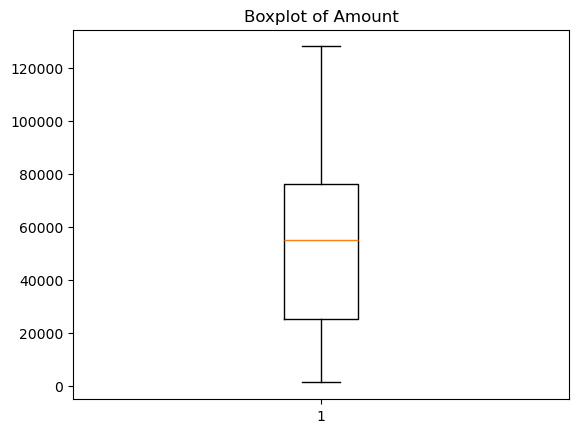

In [82]:
plt.boxplot(sorted_df['Amount'])
plt.title("Boxplot of Amount")
plt.show()

In [84]:
## Boxplot interpretation:
   ##  - The box is showing the range between Q1 and Q3 (the middle of the data) - starting a little over 20000 to around 80000. This means we can deduct that the median is a little around 60,000 (and there are no strong outliers) - Let's dig futher

In [86]:
sorted_df.describe(percentiles=None, include=None, exclude=None)

,Amount
count,226.000000
mean,51657.008717
std,28714.188108
min,1275.790000
25%,25240.975000
50%,55112.715000
75%,76213.042500
max,128122.420000


In [ ]:
## Here we can see that we have 226 columns, with the mean deal of "closed Won" is 51657. To explore more we want to see total "Amount" (Revenue) per utm_Campaign and utm_Source within each campaign

### Groupby Campaigns and Deal Amount ("Amount")

In [96]:
campaign_revenue = sorted_df.groupby('utm_campaign')['Amount'].sum().sort_values(ascending=False)
campaign_revenue

utm_campaign
campaign_1     1972458.20
campaign_5     1578171.30
campaign_9     1396443.29
campaign_4     1370417.80
campaign_8     1191698.89
campaign_2     1162075.18
campaign_7      889032.81
campaign_3      829837.75
campaign_10     769691.46
campaign_6      514657.29
Name: Amount, dtype: float64

### Graphplot: UTM_Campaing & Deal Amount

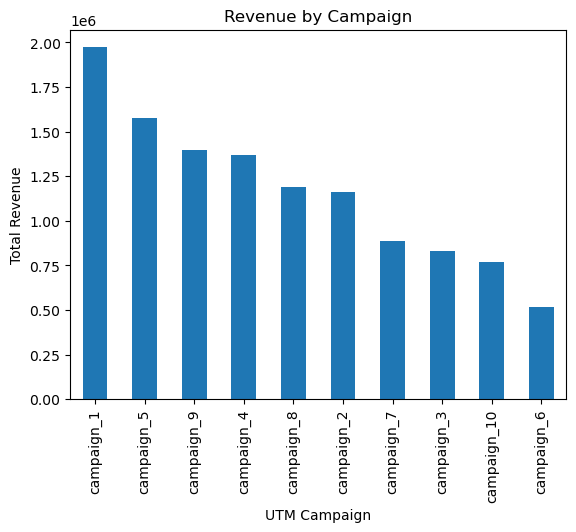

In [104]:
campaign_revenue.plot(kind='bar', title="Revenue by Campaign")
plt.xlabel('UTM Campaign')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
#Here we can already very quickly see that campaign 1, followed by 5, and campaign 9 are connected to the highest revenue

### Sourting UTM_Source and Deal Amount

In [102]:
source_revenue = sorted_df.groupby('utm_source')['Amount'].sum().sort_values(ascending=False)
source_revenue

utm_source
linkedin     2665239.92
google       2461203.60
instagram    2310010.09
twitter      2147482.63
facebook     2090547.73
Name: Amount, dtype: float64

### Graphplot: UTM_Source & Deal Amount

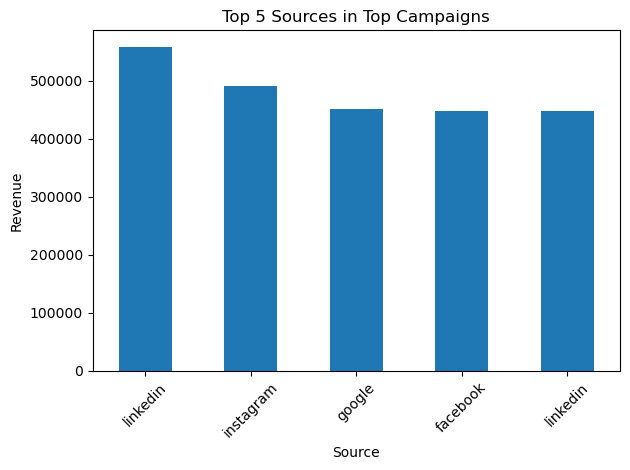

In [118]:
top5_campaign = campaign_source_revenue.reset_index().head(5)
top5_campaign.plot(kind='bar', x='utm_source', y='Amount', title="Top 5 Sources in Top Campaigns", legend=False)
plt.ylabel("Revenue")
plt.xlabel("Source")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Grouping Campaign and Source Revenue

Here we can see that LinkedIn, followed by Google, Instagram and Facebook being the last are the sources that are connected to the highest revenue

In [100]:
campaign_source_revenue = sorted_df.groupby(['utm_campaign', 'utm_source'])['Amount'].sum().sort_values(ascending=False)
print(campaign_source_revenue)

utm_campaign  utm_source
campaign_1    linkedin      559323.11
campaign_9    instagram     491920.50
campaign_5    google        451871.45
campaign_1    facebook      448845.75
campaign_2    linkedin      448421.10
campaign_5    twitter       410329.40
campaign_8    twitter       389013.14
campaign_4    google        381510.36
campaign_8    instagram     365583.22
campaign_1    instagram     357097.78
              twitter       328914.87
campaign_5    linkedin      324487.27
campaign_10   google        306782.64
campaign_9    linkedin      298121.98
campaign_1    google        278276.69
campaign_9    facebook      276797.70
campaign_4    instagram     275987.86
              linkedin      273063.48
campaign_3    google        271887.49
campaign_4    facebook      270181.70
campaign_9    twitter       242629.28
campaign_5    instagram     235399.87
campaign_7    google        227303.52
              twitter       226083.25
campaign_6    google        213789.03
campaign_10   linkedin   

### Revenue by Country

In [122]:
country_revenue = sorted_df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
print(country_revenue)

Country
Dominica                252094.00
Chile                   251110.83
Vanuatu                 243048.80
Algeria                 225891.63
Syrian Arab Republic    213344.67
                          ...    
Azerbaijan                6442.88
Puerto Rico               5877.82
Andorra                   4472.94
Netherlands Antilles      1991.38
Gabon                     1857.43
Name: Amount, Length: 143, dtype: float64


### Extracting Top 10 Countries by Revenue

In [ ]:
#What we can deduct from here is that the top campaign-source combinations is - campaign_1 with Linkedin as a source, campaign_9 with Instagram as a source, and campapgin_5, with Google as a source. 

In [128]:
top10_countries = country_revenue.reset_index().head(10)
top10_countries

,Country,Amount
0,Dominica,252094.00
1,Chile,251110.83
2,Vanuatu,243048.80
3,Algeria,225891.63
4,Syrian Arab Republic,213344.67
5,Nauru,212170.62
6,Guam,186830.70
7,Seychelles,185874.10
8,Korea,176544.15
9,Taiwan,171662.97


In [63]:
df_check= df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
print(df_check)

Country
Korea                       708576.12
Chile                       594054.72
Vanuatu                     545645.13
Turks and Caicos Islands    530597.03
Afghanistan                 512785.07
                              ...    
Antigua and Barbuda          40172.36
Pitcairn Islands             39064.44
Ecuador                      34285.70
Saudi Arabia                 31724.03
Luxembourg                   16565.74
Name: Amount, Length: 239, dtype: float64


# Statistical Analysis 
Aim is to check if there is significcant association between utm_source and revenue. To do this we are dividing up between "high" and "low" revenue As the T-test includes two categorical parameters we use the T-test- 
 As we do not have any knowledge on the population paramaters we are using the t-test instead of Z-test 

## Hypothesis Testing: t-test 

#### In order to categorise Revenue from a nominal set, we divide up the "Amount" into quantiles (50/50)

In [81]:
sorted_df['revenue_category'] = pd.qcut(sorted_df['Amount'], q=2, labels=['Low', 'High'])
contingency_table = pd.crosstab(sorted_df['utm_source'], sorted_df['revenue_category'])
contingency_table

revenue_category,Low,High
utm_source,,
facebook,21,19
google,25,23
instagram,23,24
linkedin,25,26
twitter,19,21


#### Chi-square Test

As we need a categorical and a nominal value here - we have divided up the "amount" column into two-quantile based bins. With this Chi-square test, we are trying to determine whether there is a statisical significant association between "utm_source" and "amount".

In [87]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p, dof, expected

(0.3242177722152691,
 0.9881976740516446,
 4,
 array([[20. , 20. ],
        [24. , 24. ],
        [23.5, 23.5],
        [25.5, 25.5],
        [20. , 20. ]]))

## How to read the results
Please note that as this is fake data we will not have a conclussive result. Once the input is with real data. This is how to read the results:
chi2: Measures the overall differnce between the observed and expected frequency.
p: The probability of observing data if the null hypothesis is true
dof: The number of independent comparisons that can be made
expected: The table values we would expect if there were no association between the values

## Results
Chi-Square Statistic (chi2): 0.3242 (minimal difference between observed and expected frequencies).
P-value (p): 0.9882 (high, > 0.05, so we fail to reject the null hypothesis).
Conclusion: No significant association between utm_source (marketing source) and revenue_category (Low or High revenue).

This states that: the choice of source does not appear to influence if the revenue falls into a "High" or "Low" category. We can deduct that marketing sources perform rather similiary in therms of driving revenue in these categories.

#### What can we deduct?!

In [89]:
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramer_v}")

Cramér's V: 0.0378760070817522


### Crammer's V Results
Carner's V measure the association for nominal variables based on the Chi-square test. It provides a standardized value between 0 and 1 to indicate the strength of the relationship. 0 Being no association and 1 being perfect association. A value of 
0.0379
0.0379 is very close to 0, indicating a weak or negligible association between utm_source and revenue_category

## Hypothesis Testing: Kruskal-Wallis statistic

### Results and how to interpret
Kruskal-Wallis is used to compare the distrubution of two or more indepedent groups. Here, you are comparing the revenue distributions (Amount) for two campaigns: campaign_1 and campaign_5. Please note that I have picked campaign 1 and 5 as they were the best performing campaigns. This would need to be changed. 

Interpretation:
The revenue distributions for campaign_1 and campaign_5 are identical
Revenue performance between campaign_1 and campaign_5 is similar. There's no evidence that one campaign significantly outperformed the other.